In [2]:
# Installations
!pip install kagglehub

In [3]:
# Imports
# Data Handling
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("./data/HEALTHCAREEE.csv")
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,328,Emergency,2024-02-07,Azithromycin,Normal,7
1,Leslie Terry,15,Female,B-,Flu,2019-08-20,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,265,Emergency,2019-08-22,Tamiflu,Abnormal,2
2,Danny Smith,50,Female,A+,Cancer,2022-09-22,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,205,Elective,2022-10-30,Cisplatin,Inconclusive,38
3,Andrew Watts,24,Female,O+,Asthma,2020-11-18,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,450,Elective,2020-11-19,Prednisone,Normal,1
4,Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,62,Male,AB-,Cancer,2020-08-16,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,417,Urgent,2020-09-26,Doxorubicin,Abnormal,41
55496,Kyle Perez,63,Male,A+,Heart Disease,2020-01-23,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,316,Emergency,2020-03-07,Statins,Abnormal,44
55497,Heather Wang,28,Female,O+,Asthma,2020-07-13,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,347,Elective,2020-07-16,Montelukast,Normal,3
55498,Jennifer Jones,75,Male,O+,Cancer,2019-05-25,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,321,Emergency,2019-07-11,Methotrexate,Abnormal,47


In [8]:
df.shape

(55500, 16)

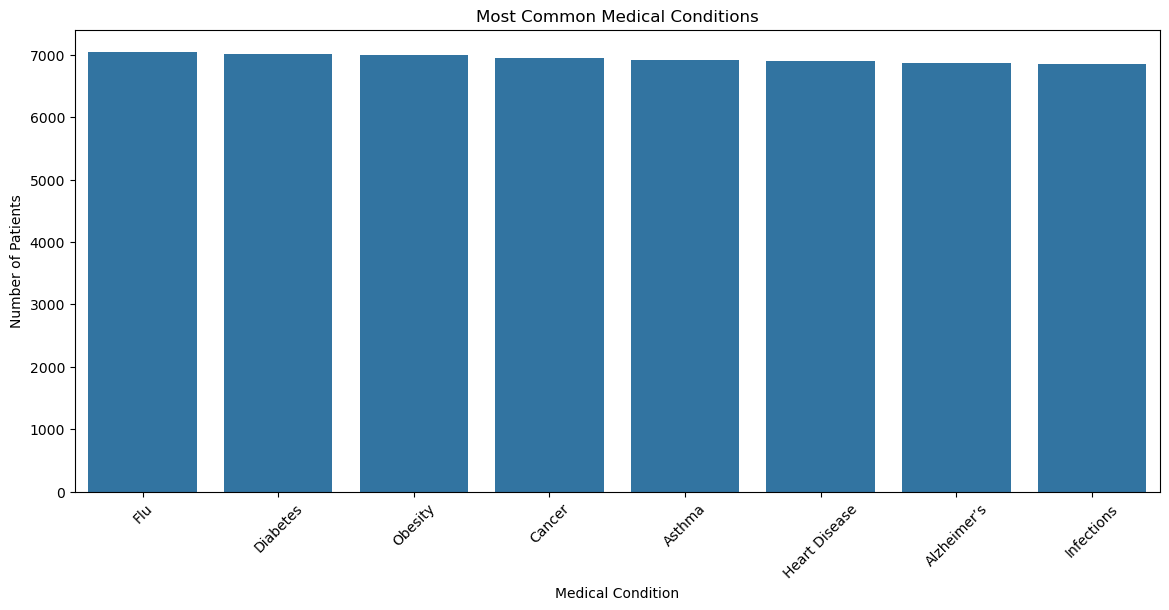

In [9]:
# Most Common Medical Condiitons:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Medical Condition', order=df['Medical Condition'].value_counts().index)
plt.title('Most Common Medical Conditions')
plt.xticks(rotation=45)
plt.ylabel('Number of Patients')
plt.xlabel('Medical Condition')
plt.show()

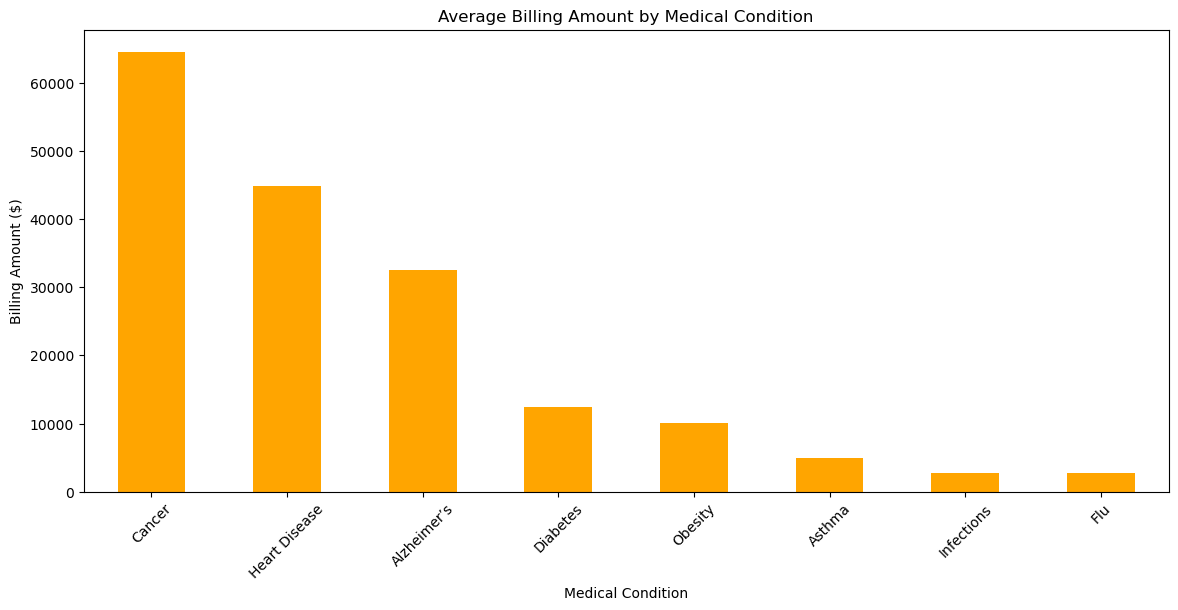

In [10]:
# Average Billing Amount by Medical Condition
avg_billing = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
avg_billing.plot(kind='bar', color='orange')
plt.title('Average Billing Amount by Medical Condition')
plt.ylabel('Billing Amount ($)')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.show()

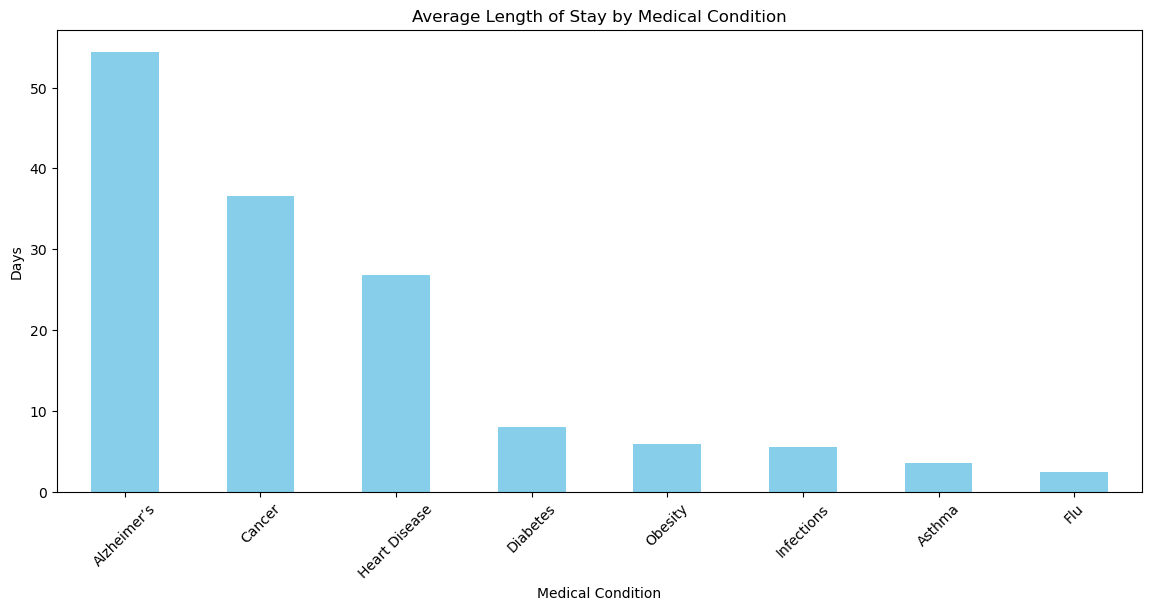

In [11]:
# Average Length of Stay by Medical Condition
avg_stay = df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
avg_stay.plot(kind='bar', color='skyblue')
plt.title('Average Length of Stay by Medical Condition')
plt.ylabel('Days')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Data Preprocessingg
# Features that are good for the analysis for predicting billing amount + length of stay
features = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Medication', 'Admission Type', 'Insurance Provider']

# Main variables for analysis
target_billing = 'Billing Ammount'
target_stay = 'Length of Stay'

In [ ]:
df.drop(columns=['Room Number', 'Name'])

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Length of Stay
0,19,Female,AB+,Infections,Matthew Smith,Northwestern Memorial Hospital,Blue Cross,2212.272701,Emergency,Azithromycin,Normal,7
1,15,Female,B-,Flu,Samantha Davies,UI Health (University of Illinois Hospital),UnitedHealthcare,3185.161388,Emergency,Tamiflu,Abnormal,2
2,50,Female,A+,Cancer,Tiffany Mitchell,UI Health (University of Illinois Hospital),Blue Cross,72055.214065,Elective,Cisplatin,Inconclusive,38
3,24,Female,O+,Asthma,Kevin Wells,UI Health (University of Illinois Hospital),Aetna,4092.601229,Elective,Prednisone,Normal,1
4,80,Female,A+,Heart Disease,Kathleen Hanna,Northwestern Memorial Hospital,Cigna,47985.660254,Routine,Beta-blockers,Inconclusive,38
...,...,...,...,...,...,...,...,...,...,...,...,...
55495,62,Male,AB-,Cancer,Joshua Jarvis,Northwestern Memorial Hospital,Cigna,59679.584305,Urgent,Doxorubicin,Abnormal,41
55496,63,Male,A+,Heart Disease,Taylor Sullivan,UI Health (University of Illinois Hospital),Medicare,26828.223456,Emergency,Statins,Abnormal,44
55497,28,Female,O+,Asthma,Joe Jacobs DVM,Northwestern Memorial Hospital,Cigna,6041.030866,Elective,Montelukast,Normal,3
55498,75,Male,O+,Cancer,Kimberly Curry,UChicago Medicine,Aetna,44495.656362,Emergency,Methotrexate,Abnormal,47


In [76]:
df["Hospital"].unique().size

4

In [77]:
avg_billing_by_hospital = df.groupby('Hospital')['Billing Amount'].mean().sort_values(ascending=False)


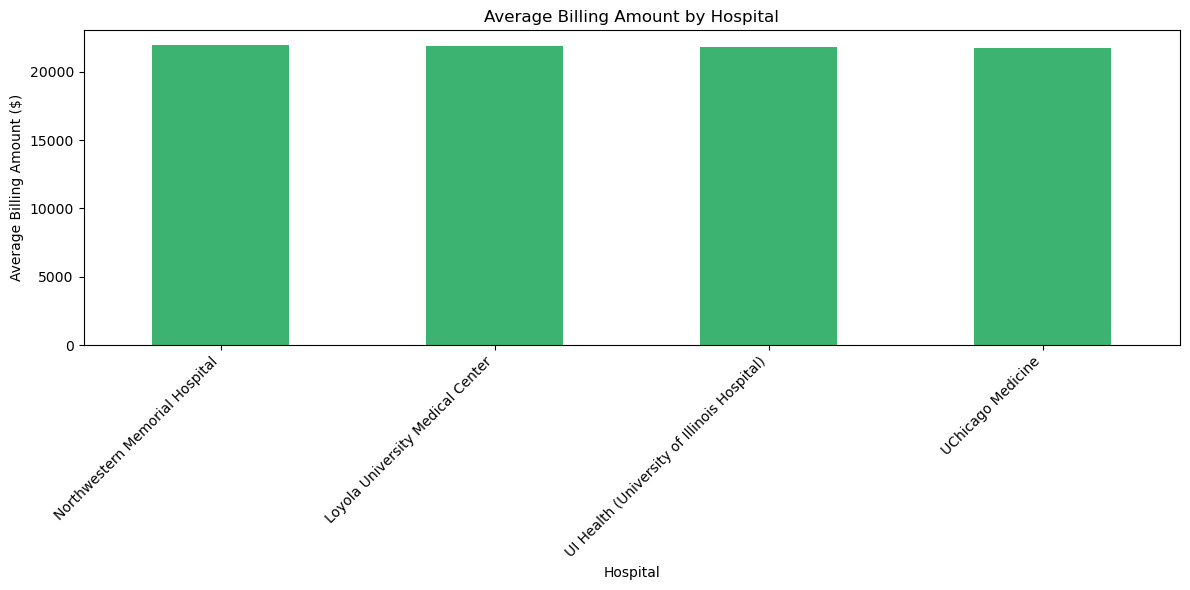

In [80]:
plt.figure(figsize=(12,6))
avg_billing_by_hospital.plot(kind='bar', color='mediumseagreen')
plt.title('Average Billing Amount by Hospital')
plt.ylabel('Average Billing Amount ($)')
plt.xlabel('Hospital')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [83]:
df.drop(columns=["Doctor", "Hospital"])

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay,Age Group
0,Bobby Jackson,19,Female,AB+,Infections,2024-01-31,Blue Cross,2212.272701,328,Emergency,2024-02-07,Azithromycin,Normal,7,0-20
1,Leslie Terry,15,Female,B-,Flu,2019-08-20,UnitedHealthcare,3185.161388,265,Emergency,2019-08-22,Tamiflu,Abnormal,2,0-20
2,Danny Smith,50,Female,A+,Cancer,2022-09-22,Blue Cross,72055.214065,205,Elective,2022-10-30,Cisplatin,Inconclusive,38,41-60
3,Andrew Watts,24,Female,O+,Asthma,2020-11-18,Aetna,4092.601229,450,Elective,2020-11-19,Prednisone,Normal,1,21-40
4,Adrienne Bell,80,Female,A+,Heart Disease,2022-09-19,Cigna,47985.660254,458,Routine,2022-10-27,Beta-blockers,Inconclusive,38,61-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,62,Male,AB-,Cancer,2020-08-16,Cigna,59679.584305,417,Urgent,2020-09-26,Doxorubicin,Abnormal,41,61-80
55496,Kyle Perez,63,Male,A+,Heart Disease,2020-01-23,Medicare,26828.223456,316,Emergency,2020-03-07,Statins,Abnormal,44,61-80
55497,Heather Wang,28,Female,O+,Asthma,2020-07-13,Cigna,6041.030866,347,Elective,2020-07-16,Montelukast,Normal,3,21-40
55498,Jennifer Jones,75,Male,O+,Cancer,2019-05-25,Aetna,44495.656362,321,Emergency,2019-07-11,Methotrexate,Abnormal,47,61-80
